# Exploratory Data Analysis - Avocado Prices in US 

A Data Analysis with Python Capstone Project Assignment from the course: "Zero to Pandas" by Jovian.ai

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

In [3]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
# Change this
dataset_url = 'https://www.kaggle.com/neuromusic/avocado-prices' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\avocado-prices" (use force=True to force download)


The dataset has been downloaded and extracted.

In [6]:
# Change this
data_dir = './avocado-prices'

In [7]:
import os
os.listdir(data_dir)

['avocado.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "avocado-prices"

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

<IPython.core.display.Javascript object>

In [11]:
jovian.commit(environment=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## Data Preparation and Cleaning

#### First, we import the required libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Next, load the data as a pandas DataFrame

In [13]:
df = pd.read_csv(f'{data_dir}/avocado.csv', decimal=',')

In [14]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


This is how the data looks like

#### Next, we explore the dataset by answering questions about number of rows & columns, ranges of values etc.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    18249 non-null  int64 
 1   Date          18249 non-null  object
 2   AveragePrice  18249 non-null  object
 3   Total Volume  18249 non-null  object
 4   4046          18249 non-null  object
 5   4225          18249 non-null  object
 6   4770          18249 non-null  object
 7   Total Bags    18249 non-null  object
 8   Small Bags    18249 non-null  object
 9   Large Bags    18249 non-null  object
 10  XLarge Bags   18249 non-null  object
 11  type          18249 non-null  object
 12  year          18249 non-null  int64 
 13  region        18249 non-null  object
dtypes: int64(2), object(12)
memory usage: 1.9+ MB


here, we're just checking the dtpyes of each variables (columns). We can see that most are in the incorrect format. Date should be in datatime64, variables that are numbers should be in float/int, and categorial variables should be in 'category' format. Let's change that.

First thing to do, is to change the dtype to accordance

In [16]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


but first, let us change the variable names to ease us in our process

In [17]:
df.rename(columns={
    'Date':'date',
    'AveragePrice':'average_price',
    'Total Volume':'total_volume',
    '4046':'non_org_med_hass',
    '4225':'non_org_large_hass',
    '4770':'non_org_xlarge_hass',
    'Total Bags':'total_bags',
    'Small Bags':'small_bags',
    'Large Bags':'large_bags',
    'XLarge Bags':'xlarge_bags',
}, inplace=True)

In [18]:
df.drop(columns=df.columns[0], inplace=True)

here we're just removing the index column. There's no need for that because pandas itself already has built-in indexing.

In [19]:
df.head(20)

,date,average_price,total_volume,non_org_med_hass,non_org_large_hass,non_org_xlarge_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.0,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.4,64757.44,113.0,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [35]:
df.columns

Index(['date', 'average_price', 'total_volume', 'non_org_med_hass',
       'non_org_large_hass', 'non_org_xlarge_hass', 'total_bags', 'small_bags',
       'large_bags', 'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')

Now, let's change the dtypes!

In [21]:
df = df.astype({
    df.columns[0]:'datetime64'
})
for column in df.columns[1:10]:
    df = df.astype({column:'float64'})
    
df = df.astype({'type':'category'})
df.region = df.region.astype('category')
df.year = df.year.astype('category')

In [22]:
df.dtypes

date                   datetime64[ns]
average_price                 float64
total_volume                  float64
non_org_med_hass              float64
non_org_large_hass            float64
non_org_xlarge_hass           float64
total_bags                    float64
small_bags                    float64
large_bags                    float64
xlarge_bags                   float64
type                         category
year                         category
region                       category
dtype: object

In [23]:
df.columns

Index(['date', 'average_price', 'total_volume', 'non_org_med_hass',
       'non_org_large_hass', 'non_org_xlarge_hass', 'total_bags', 'small_bags',
       'large_bags', 'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')

Another thing that we should do is to extract the month and day from the date column and change its dtype to category

In [36]:
dates = pd.DatetimeIndex(df.date)
df['month'] = dates.month
df['day'] = dates.day

In [37]:
df.month = df.month.astype('category')
df.day = df.day.astype('category')

All set! Next, checking the different categories

In [43]:
df.month.unique()

[12, 11, 10, 9, 8, ..., 5, 4, 3, 2, 1]
Length: 12
Categories (12, int64): [12, 11, 10, 9, ..., 4, 3, 2, 1]

In [42]:
df.day.unique()

[27, 20, 13, 6, 29, ..., 31, 24, 17, 10, 3]
Length: 31
Categories (31, int64): [27, 20, 13, 6, ..., 24, 17, 10, 3]

In [41]:
df.type.unique()

['conventional', 'organic']
Categories (2, object): ['conventional', 'organic']

In [40]:
df.year.unique()

[2015, 2016, 2017, 2018]
Categories (4, int64): [2015, 2016, 2017, 2018]

next, we check if there is any NaN values in our dataset and replace/remove them if necessary

In [44]:
df.isna().any().any()

False

Nice, we have no NaN values in our dataset! This conclude our data preparation and cleaning step.

In [45]:
import jovian

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "naufal-anof/avocado-prices" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/naufal-anof/avocado-prices


'https://jovian.ai/naufal-anof/avocado-prices'

## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [49]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

First, lets do descriptive statistics on our dataset

In [50]:
df.describe()

,average_price,total_volume,non_org_med_hass,non_org_large_hass,non_org_xlarge_hass,total_bags,small_bags,large_bags,xlarge_bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


We can see the mean of each variables which are very useful later on, but we can still dig deeper and analyze each variables.

In [51]:
df.groupby(['type']).describe()
# descriptive analysis based on whether the avocado is conventional or organic

average_price                                                    \
                     count      mean       std   min   25%   50%   75%   max   
type                                                                           
conventional        9126.0  1.158040  0.263041  0.46  0.98  1.13  1.32  2.22   
organic             9123.0  1.653999  0.363502  0.44  1.42  1.63  1.87  3.25   

             total_volume                ...  large_bags              \
                    count          mean  ...         75%         max   
type                                     ...                           
conventional       9126.0  1.653213e+06  ...  59910.8325  5719096.61   
organic            9123.0  4.781121e+04  ...   2991.8200   561530.39   

             xlarge_bags                                                \
                   count         mean           std  min  25%      50%   
type                                                                     
conventional      9126.0  6210.635065  24631.904345  0.0  0.0  122.255   
organic           9123.0     1.197164     14.727286  0.0  0.0    0.000   

                                   
                   75%        max  
type                               
conventional  2409.215  551693.65  
organic          0.000     510.41  

[2 rows x 72 columns]

In [52]:
df.groupby(['region']).describe()
# descriptive analysis based on region

average_price                                           \
                            count      mean       std   min     25%    50%   
region                                                                       
Albany                      338.0  1.561036  0.291986  0.85  1.3500  1.560   
Atlanta                     338.0  1.337959  0.398297  0.62  1.0400  1.230   
BaltimoreWashington         338.0  1.534231  0.299428  0.95  1.2600  1.550   
Boise                       338.0  1.348136  0.457911  0.58  1.0300  1.220   
Boston                      338.0  1.530888  0.328074  0.85  1.2600  1.555   
BuffaloRochester            338.0  1.516834  0.274362  1.03  1.3400  1.480   
California                  338.0  1.395325  0.390543  0.67  1.0800  1.375   
Charlotte                   338.0  1.606036  0.414492  0.80  1.2500  1.585   
Chicago                     338.0  1.556775  0.335439  0.70  1.2400  1.610   
CincinnatiDayton            338.0  1.209201  0.351322  0.44  0.9325  1.100   
Columbus                    338.0  1.252781  0.315908  0.52  1.0100  1.180   
DallasFtWorth               338.0  1.085592  0.295742  0.65  0.8200  1.040   
Denver                      338.0  1.218580  0.317915  0.60  0.9900  1.165   
Detroit                     338.0  1.276095  0.318164  0.48  1.0300  1.225   
GrandRapids                 338.0  1.505000  0.369502  0.77  1.2400  1.505   
GreatLakes                  338.0  1.338550  0.256373  0.73  1.1100  1.340   
HarrisburgScranton          338.0  1.513284  0.318204  0.91  1.2125  1.475   
HartfordSpringfield         338.0  1.818639  0.468989  0.86  1.3900  1.800   
Houston                     338.0  1.047929  0.302155  0.51  0.7900  0.980   
Indianapolis                338.0  1.313994  0.282894  0.77  1.0800  1.290   
Jacksonville                338.0  1.510947  0.417741  0.54  1.2000  1.470   
LasVegas                    338.0  1.380917  0.473968  0.54  1.0000  1.265   
LosAngeles                  338.0  1.216006  0.378557  0.53  0.9400  1.140   
Louisville                  338.0  1.286686  0.318991  0.56  1.0400  1.230   
MiamiFtLauderdale           338.0  1.428491  0.336494  0.59  1.2300  1.420   
Midsouth                    338.0  1.404763  0.263633  0.91  1.1700  1.400   
Nashville                   338.0  1.212101  0.332029  0.51  0.9600  1.105   
NewOrleansMobile            338.0  1.304793  0.300137  0.58  1.0300  1.340   
NewYork                     338.0  1.727574  0.395898  0.77  1.3600  1.780   
Northeast                   338.0  1.601923  0.313513  0.87  1.3200  1.640   
NorthernNewEngland          338.0  1.477396  0.296769  0.95  1.1900  1.510   
Orlando                     338.0  1.506213  0.393153  0.58  1.2200  1.470   
Philadelphia                338.0  1.632130  0.320284  0.91  1.3800  1.625   
PhoenixTucson               338.0  1.224438  0.548283  0.46  0.6800  1.225   
Pittsburgh                  338.0  1.364320  0.175473  0.87  1.2600  1.390   
Plains                      338.0  1.436509  0.326350  0.76  1.1125  1.495   
Portland                    338.0  1.317722  0.464029  0.68  0.9800  1.210   
RaleighGreensboro           338.0  1.555118  0.427306  0.86  1.2200  1.490   
RichmondNorfolk             338.0  1.291331  0.256114  0.78  1.0600  1.250   
Roanoke                     338.0  1.247929  0.281199  0.70  1.0300  1.160   
Sacramento                  338.0  1.621568  0.445139  0.86  1.2200  1.600   
SanDiego                    338.0  1.398166  0.456451  0.61  1.0400  1.300   
SanFrancisco                338.0  1.804201  0.565371  0.84  1.3400  1.695   
Seattle                     338.0  1.442574  0.472787  0.70  1.1000  1.340   
SouthCarolina               338.0  1.403284  0.330502  0.69  1.1100  1.380   
SouthCentral                338.0  1.101243  0.287162  0.62  0.8400  1.065   
Southeast                   338.0  1.398018  0.320415  0.62  1.1425  1.400   
Spokane                     338.0  1.445592  0.485965  0.74  1.0800  1.320   
StLouis                     338.0  1.43062

In [53]:
df.groupby(['year']).describe()
# descriptive analysis based on year

average_price                                                     \
             count      mean       std   min   25%    50%   75%   max   
year                                                                    
2015        5615.0  1.375590  0.375595  0.49  1.07  1.300  1.67  2.79   
2016        5616.0  1.338640  0.393708  0.51  1.04  1.300  1.56  3.25   
2017        5722.0  1.515128  0.432906  0.44  1.22  1.490  1.77  3.17   
2018        1296.0  1.347531  0.305858  0.56  1.13  1.345  1.56  2.30   

     total_volume                ...  large_bags             xlarge_bags  \
            count          mean  ...         75%         max       count   
year                             ...                                       
2015       5615.0  7.810274e+05  ...  10066.9000  1371440.28      5615.0   
2016       5616.0  8.584206e+05  ...  26223.6475  3373077.87      5616.0   
2017       5722.0  8.623393e+05  ...  30473.1550  4324231.19      5722.0   
2018       1296.0  1.066928e+06  ...  39849.8450  5719096.61      1296.0   

                                                                    
             mean           std  min  25%  50%      75%        max  
year                                                                
2015   969.390611   6417.535470  0.0  0.0  0.0    0.000  199305.12  
2016  3568.070662  19574.150528  0.0  0.0  0.0  344.580  551693.65  
2017  4193.843471  20588.640836  0.0  0.0  0.0  447.585  377661.06  
2018  5563.728295  25818.259882  0.0  0.0  0.0  842.070  309467.53  

[4 rows x 72 columns]

In [54]:
df.groupby(['month']).describe()
# descriptive analysis based on month

average_price                                                       \
              count      mean       std   min   25%    50%     75%   max   
month                                                                      
1            1944.0  1.311019  0.351354  0.51  1.05  1.280  1.5400  2.70   
2            1728.0  1.274387  0.371938  0.46  0.98  1.250  1.5425  2.59   
3            1836.0  1.332255  0.359994  0.44  1.08  1.300  1.5700  3.05   
4            1404.0  1.374380  0.399556  0.51  1.08  1.340  1.6300  3.17   
5            1512.0  1.346601  0.402380  0.55  1.04  1.320  1.6000  2.73   
6            1294.0  1.408964  0.409618  0.52  1.10  1.345  1.6800  2.77   
7            1512.0  1.462077  0.388644  0.56  1.17  1.420  1.7100  2.75   
8            1404.0  1.512514  0.415345  0.58  1.17  1.470  1.7800  3.04   
9            1296.0  1.572654  0.448046  0.58  1.19  1.560  1.8500  2.97   
10           1512.0  1.579683  0.418319  0.65  1.27  1.570  1.8200  3.25   
11           1404.0  1.455563  0.382073  0.60  1.15  1.450  1.7000  3.12   
12           1403.0  1.331112  0.357784  0.49  1.04  1.310  1.5800  2.67   

      total_volume                ...  large_bags             xlarge_bags  \
             count          mean  ...         75%         max       count   
month                             ...                                       
1           1944.0  9.035654e+05  ...  25398.8625  3917569.95      1944.0   
2           1728.0  1.018825e+06  ...  27873.8500  5719096.61      1728.0   
3           1836.0  8.845054e+05  ...  25372.7700  3988101.74      1836.0   
4           1404.0  8.801935e+05  ...  23103.3350  3434846.78      1404.0   
5           1512.0  9.727150e+05  ...  23413.1425  4324231.19      1512.0   
6           1294.0  9.293397e+05  ...  19173.8075  3267491.24      1294.0   
7           1512.0  8.590482e+05  ...  19129.8050  3119708.27      1512.0   
8           1404.0  8.036857e+05  ...  15519.3800  3118889.17      1404.0   
9           1296.0  7.533192e+05  ...  19629.3200  2476400.79      1296.0   
10          1512.0  6.803941e+05  ...  19405.9650  2981275.76      1512.0   
11          1404.0  6.796073e+05  ...  20497.3925  3275463.49      1404.0   
12          1403.0  7.746305e+05  ...  23097.9750  3122650.26      1403.0   

                                                                       
              mean           std  min  25%  50%        75%        max  
month                                                                  
1      2321.004763  13036.507053  0.0  0.0  0.0    14.2450  206519.30  
2      3246.677569  18060.082905  0.0  0.0  0.0   119.9775  303536.64  
3      3197.617609  17796.465801  0.0  0.0  0.0    58.0075  309467.53  
4      2502.063120  13556.451200  0.0  0.0  0.0    96.0025  207846.53  
5      3141.260939  16939.957694  0.0  0.0  0.0   250.2250  256887.21  
6      5276.559815  26141.839204  0.0  0.0  0.0  1678.7500  347390.14  
7      6433.567467  32360.490299  0.0  0.0  0.0  2104.1725  551693.65  
8      3566.063967  18255.854584  0.0  0.0  0.0   879.1625  317517.95  
9      2217.225131  11308.163998  0.0  0.0  0.0   100.3600  218394.57  
10     1539.862262   7581.245124  0.0  0.0  0.0    11.2675   91798.83  
11     1463.451766   7718.752454  0.0  0.0  0.0    16.4250   95159.00  
12     2576.563172  13160.698669  0.0  0.0  0.0    73.0000  199305.12  

[12 rows x 72 columns]

now we got some useful information from the result of our descriptive analysis. We now know the mean of average prices in each month and year. we also know the mean of sales volume, total bags, etc etc per category.

next, lets plot the distribution of the average price, total volumme, etc

range                     : 2.81
number of class intervals : 33.37915635786309
class interval width      : 0.08418427266026607


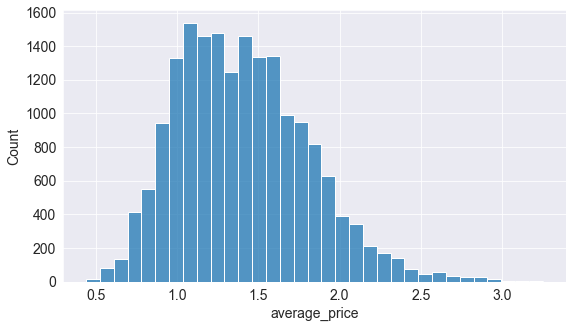

In [55]:
#for df['average_price']
range = max(df.average_price) - min(df.average_price)
num_of_class_interval = 1 + 3.3 * np.log(len(df.average_price))
class_interval_width = range / num_of_class_interval

sns.histplot(df['average_price'], bins=int(num_of_class_interval))

print(f"range                     : {range}")
print(f"number of class intervals : {num_of_class_interval}")
print(f"class interval width      : {class_interval_width}")

range                     : 62505561.96
number of class intervals : 33.37915635786309
class interval width      : 1872592.6230689662


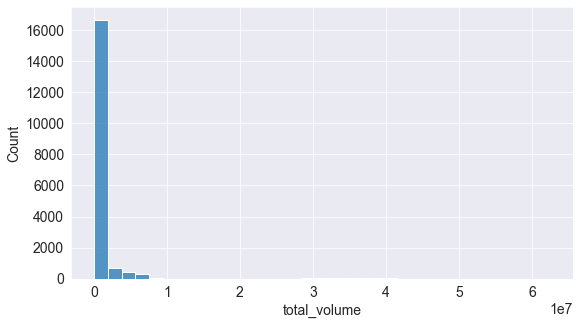

In [56]:
#for df['total_volume']
range = max(df.total_volume) - min(df.total_volume)
num_of_class_interval = 1 + 3.3 * np.log(len(df.total_volume))
class_interval_width = range / num_of_class_interval

sns.histplot(df['total_volume'], bins=int(num_of_class_interval))

print(f"range                     : {range}")
print(f"number of class intervals : {num_of_class_interval}")
print(f"class interval width      : {class_interval_width}")

range                     : 22743616.17
number of class intervals : 33.37915635786309
class interval width      : 681371.8095856642


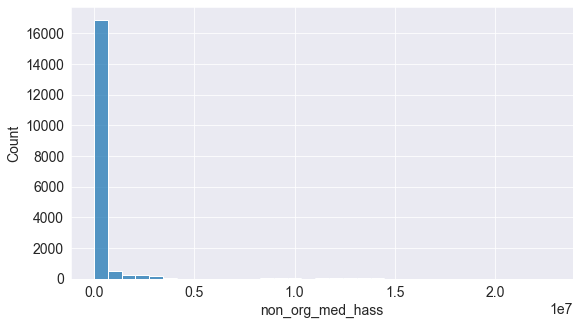

In [57]:
#for df['non_org_med_hass']
range = max(df.non_org_med_hass) - min(df.non_org_med_hass)
num_of_class_interval = 1 + 3.3 * np.log(len(df.non_org_med_hass))
class_interval_width = range / num_of_class_interval

sns.histplot(df['non_org_med_hass'], bins=int(num_of_class_interval))

print(f"range                     : {range}")
print(f"number of class intervals : {num_of_class_interval}")
print(f"class interval width      : {class_interval_width}")

range                     : 20470572.61
number of class intervals : 33.37915635786309
class interval width      : 613274.1160540977


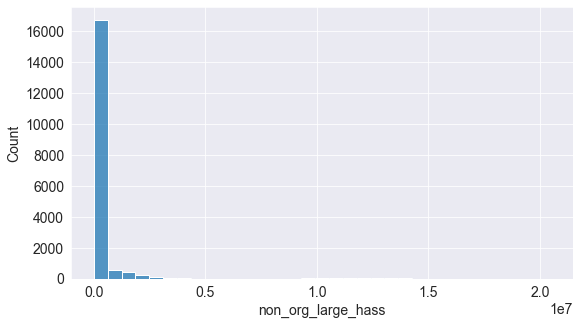

In [58]:
#for df['non_org_large_hass']
range = max(df.non_org_large_hass) - min(df.non_org_large_hass)
num_of_class_interval = 1 + 3.3 * np.log(len(df.non_org_large_hass))
class_interval_width = range / num_of_class_interval

sns.histplot(df['non_org_large_hass'], bins=int(num_of_class_interval))

print(f"range                     : {range}")
print(f"number of class intervals : {num_of_class_interval}")
print(f"class interval width      : {class_interval_width}")

range                     : 2546439.11
number of class intervals : 33.37915635786309
class interval width      : 76288.30048007304


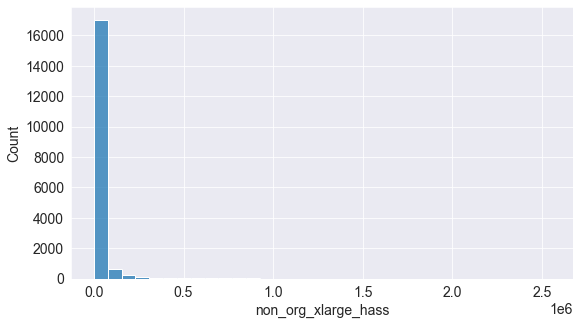

In [59]:
#for df['non_org_xlarge_hass']
range = max(df.non_org_xlarge_hass) - min(df.non_org_xlarge_hass)
num_of_class_interval = 1 + 3.3 * np.log(len(df.non_org_xlarge_hass))
class_interval_width = range / num_of_class_interval

sns.histplot(df['non_org_xlarge_hass'], bins=int(num_of_class_interval))

print(f"range                     : {range}")
print(f"number of class intervals : {num_of_class_interval}")
print(f"class interval width      : {class_interval_width}")

range                     : 19373134.37
number of class intervals : 33.37915635786309
class interval width      : 580396.1658676342


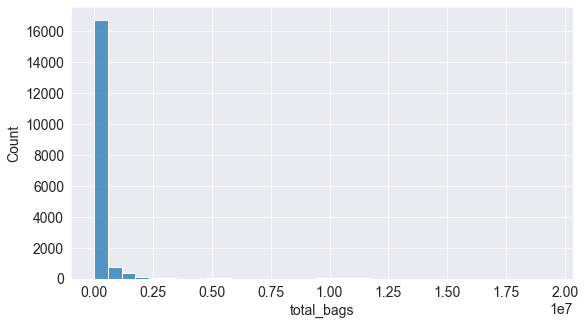

In [60]:
#for df['total_bags']
range = max(df.total_bags) - min(df.total_bags)
num_of_class_interval = 1 + 3.3 * np.log(len(df.total_bags))
class_interval_width = range / num_of_class_interval

sns.histplot(df['total_bags'], bins=int(num_of_class_interval))

print(f"range                     : {range}")
print(f"number of class intervals : {num_of_class_interval}")
print(f"class interval width      : {class_interval_width}")

range                     : 13384586.8
number of class intervals : 33.37915635786309
class interval width      : 400986.3717495367


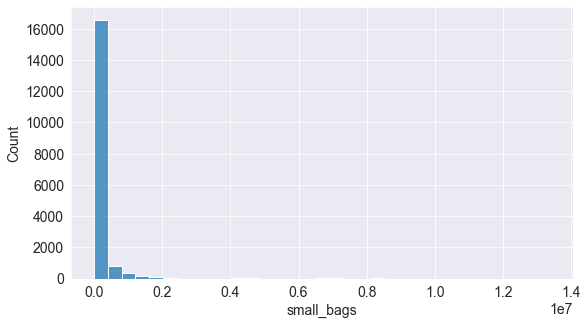

In [61]:
#for df['small_bags']
range = max(df.small_bags) - min(df.small_bags)
num_of_class_interval = 1 + 3.3 * np.log(len(df.total_volume))
class_interval_width = range / num_of_class_interval

sns.histplot(df['small_bags'], bins=int(num_of_class_interval))

print(f"range                     : {range}")
print(f"number of class intervals : {num_of_class_interval}")
print(f"class interval width      : {class_interval_width}")

range                     : 5719096.61
number of class intervals : 33.37915635786309
class interval width      : 171337.3624151756


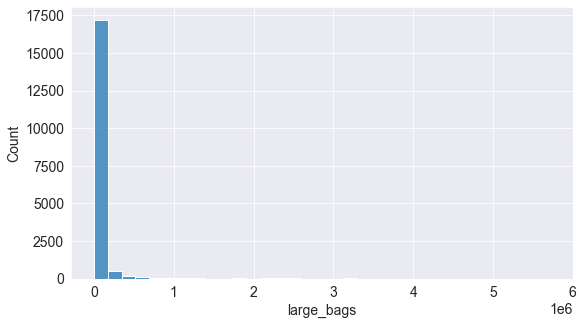

In [62]:
#for df['large_bags']
range = max(df.large_bags) - min(df.large_bags)
num_of_class_interval = 1 + 3.3 * np.log(len(df.large_bags))
class_interval_width = range / num_of_class_interval

sns.histplot(df['large_bags'], bins=int(num_of_class_interval))

print(f"range                     : {range}")
print(f"number of class intervals : {num_of_class_interval}")
print(f"class interval width      : {class_interval_width}")

Let us save and upload our work to Jovian before continuing

In [63]:
import jovian

In [64]:
jovian.commit(environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "naufal-anof/avocado-prices" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/naufal-anof/avocado-prices


'https://jovian.ai/naufal-anof/avocado-prices'

## Asking and Answering Questions

Here is where the fun begins! Now that we have some sort of understanding about our data, we can now ask more questions , find insights, etc.

#### Q1: What is the average price of avocados in each region?

we can do this by using the groupby method in pandas to get the mean of average prices in each region

In [65]:
df.head() 

,date,average_price,total_volume,non_org_med_hass,non_org_large_hass,non_org_xlarge_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [66]:
regions = df.region.values.unique()
regions

['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', ..., 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']
Length: 54
Categories (54, object): ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', ..., 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']

now, we plot the graph

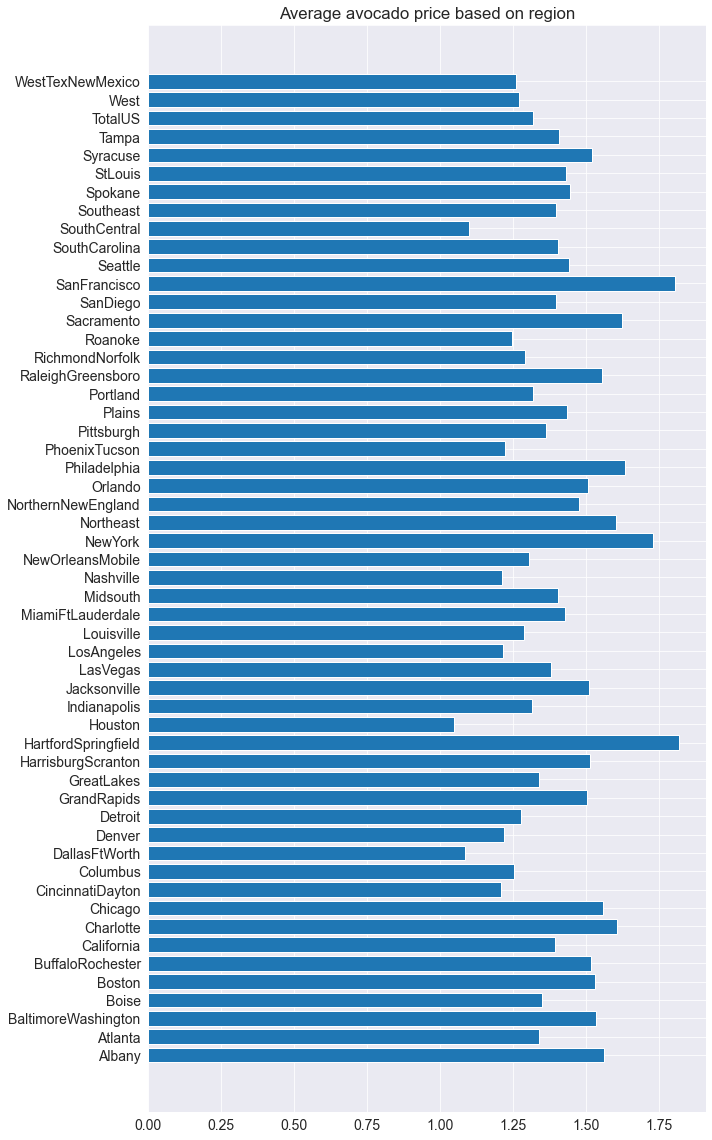

In [68]:
y = df.groupby(['region']).mean().average_price
x = df.region.unique()

plt.figure(figsize=(10,20))
plt.barh(x,y)
plt.title("Average avocado price based on region")
plt.show()

We can se that most prices lies between 1.25 and 1.5. Some region are more expensive than others, some are cheaper. We can actually group them based on the price. Which region has relatively cheap avocados, and which region has relatively expensive ones. We can divide them into 2 groups, the cheap one and the expensive one

And the separator between them is the mean of the total average price

### Q2: Which region has cheap avocados, and which has expensive ones?

The separaotr between them is the mean of df.average_price. All we do is just compare the average_price of each region. if its cheaper, it goes to the cheap_region list, if its more expensive it goes to the expensive_region list

In [88]:
cheap_region = []
expensive_region = []
mean_avg_price = df.describe()['average_price']['mean']

# loop thorugh all the region and compare its average price
for region in regions:
    if df.groupby(['region']).mean()['average_price'][region] <= mean_avg_price:
        cheap_region.append(region)
    else:
        expensive_region.append(region)

In [89]:
cheap_region

['Atlanta',
 'Boise',
 'California',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GreatLakes',
 'Houston',
 'Indianapolis',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'PhoenixTucson',
 'Pittsburgh',
 'Portland',
 'RichmondNorfolk',
 'Roanoke',
 'SanDiego',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'TotalUS',
 'West',
 'WestTexNewMexico']

In [90]:
expensive_region

['Albany',
 'BaltimoreWashington',
 'Boston',
 'BuffaloRochester',
 'Charlotte',
 'Chicago',
 'GrandRapids',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Jacksonville',
 'MiamiFtLauderdale',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'Plains',
 'RaleighGreensboro',
 'Sacramento',
 'SanFrancisco',
 'Seattle',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa']

In [92]:
len(cheap_region)

29

In [93]:
len(expensive_region)

25

In [94]:
total_regions = len(cheap_region) + len(expensive_region)
cheap_region_percentage = len(cheap_region) / total_regions * 100
expensive_region_pecentage = len(expensive_region) / total_regions * 100

In [95]:
print(f'Cheap region percentage: {cheap_region_percentage}%')
print(f'Expensive region percentage: {expensive_region_pecentage}%')

Cheap region percentage: 53.70370370370371%
Expensive region percentage: 46.2962962962963%


Now we can see that roughly 53.7% of region has cheap avocados across the state and 46.3% has relatively expensive avocados.

#### Q3: How does the average price of avocados changes for each region over time? (yearly)

we can do this by looping through all the region and creating that region's graph of the change in average price per year 

In [127]:
region_df.groupby(['year']).mean()['average_price']

year
2015    1.259320
2016    1.246635
2017    1.281538
2018    1.251250
Name: average_price, dtype: float64

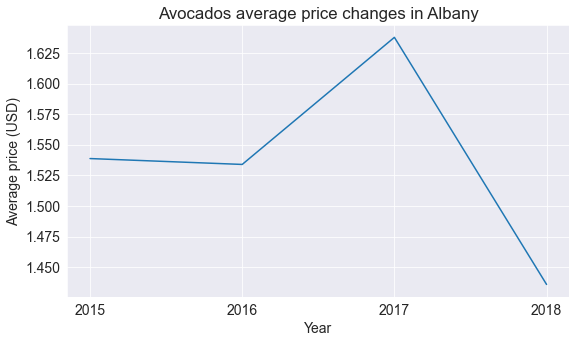

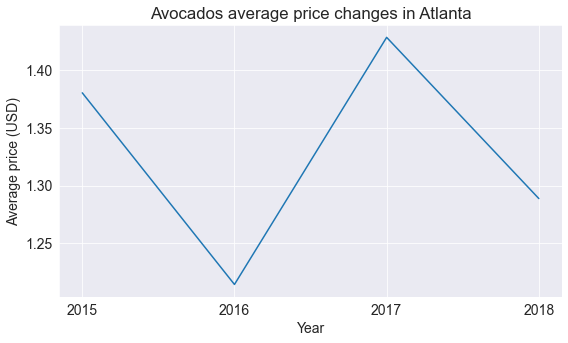

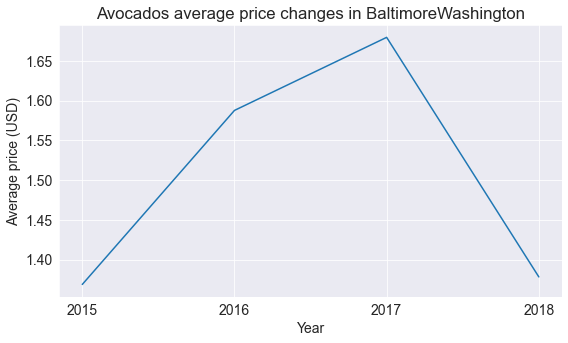

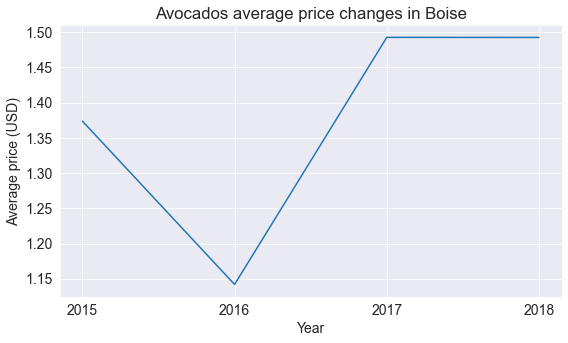

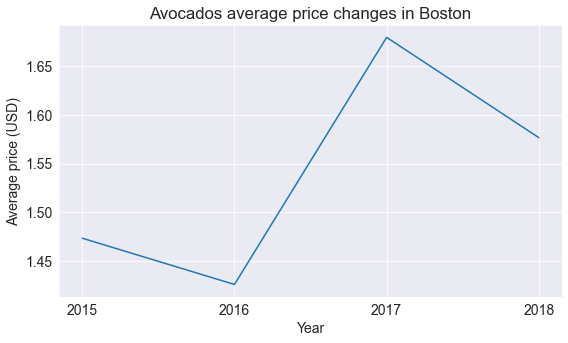

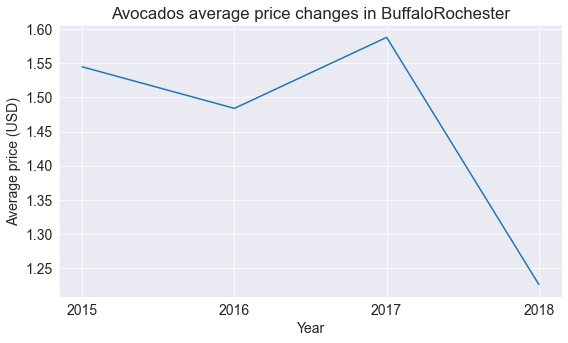

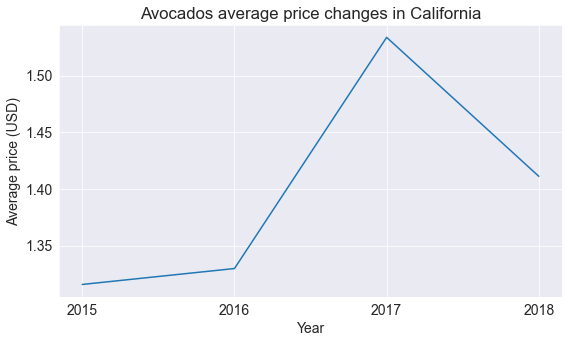

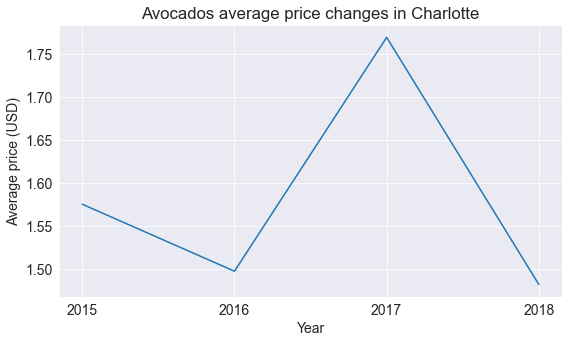

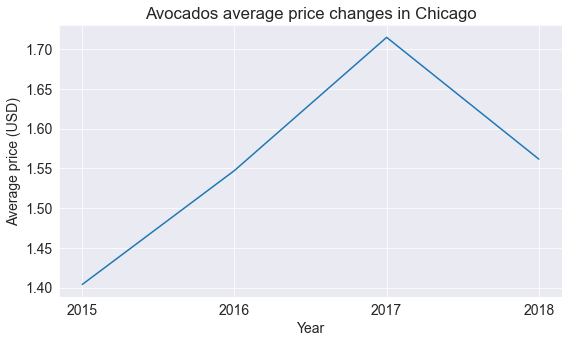

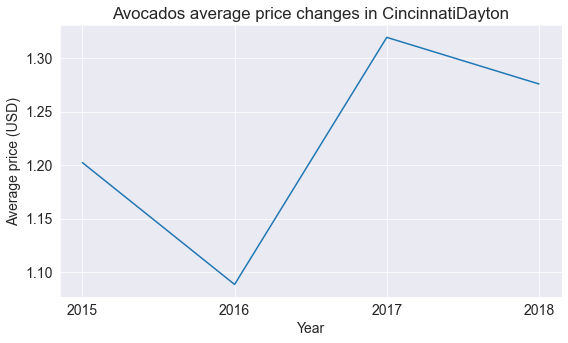

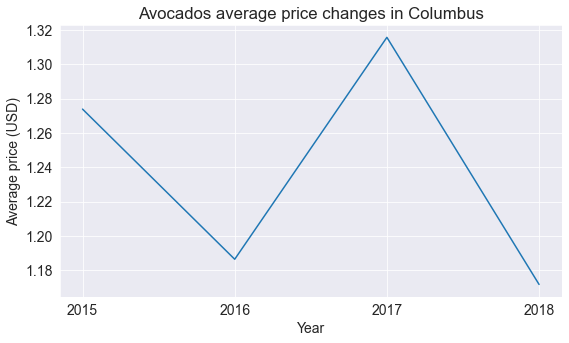

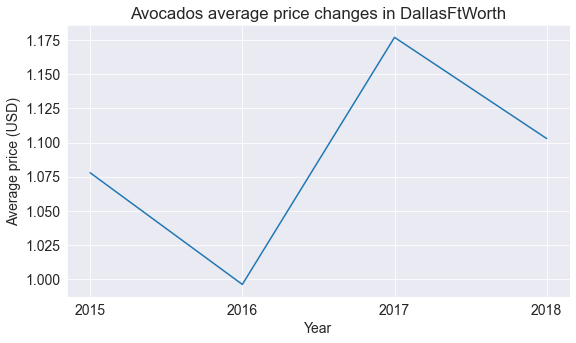

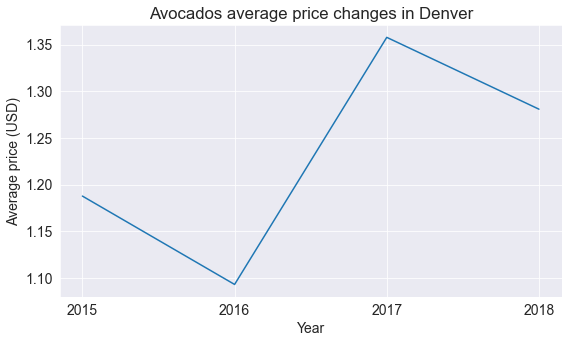

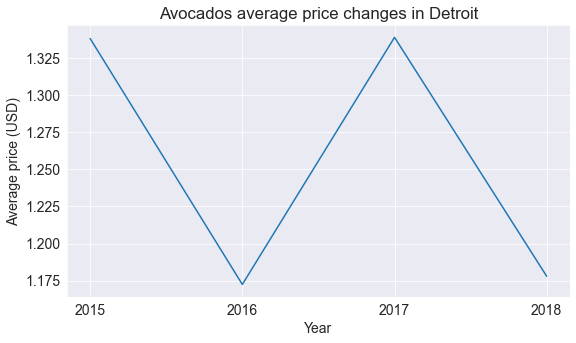

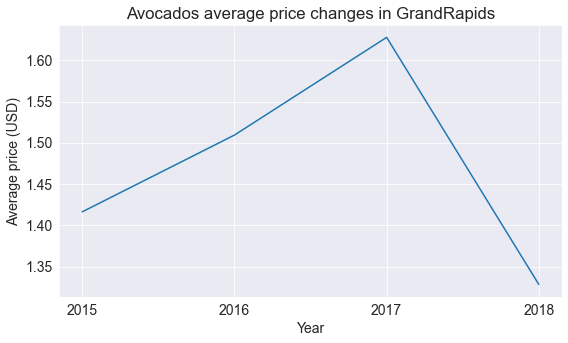

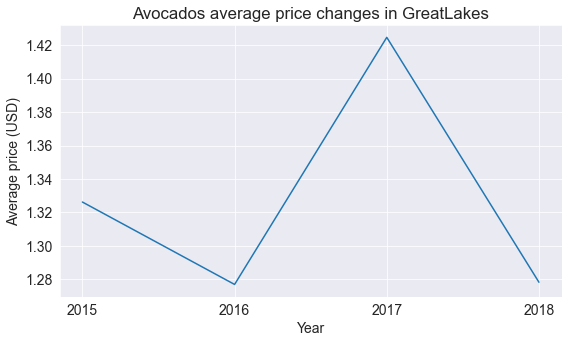

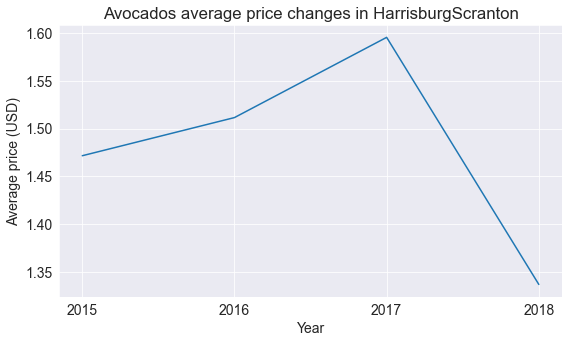

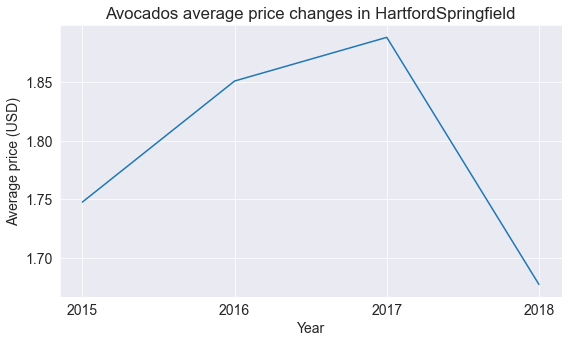

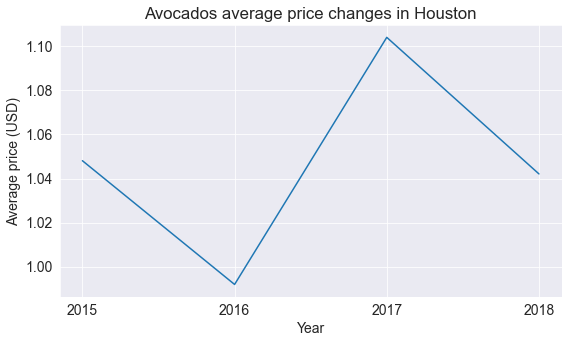

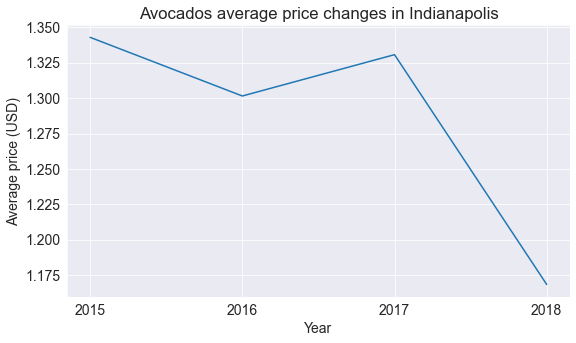

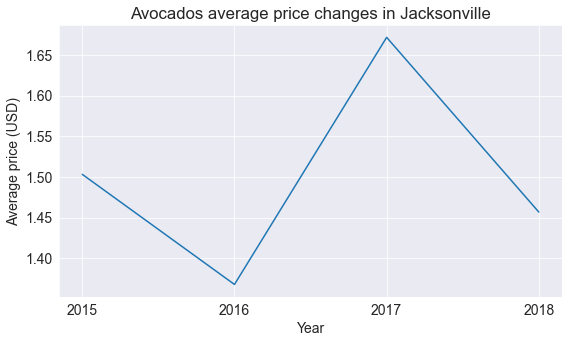

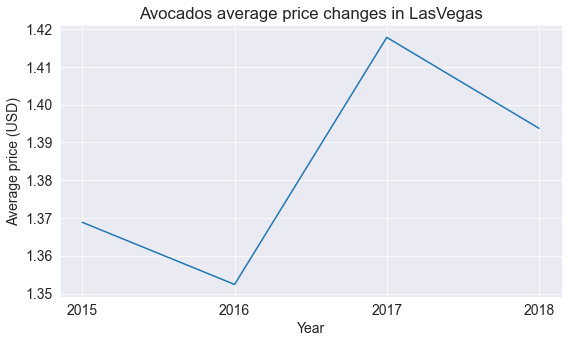

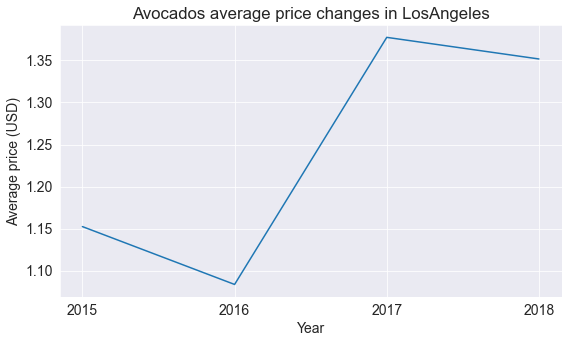

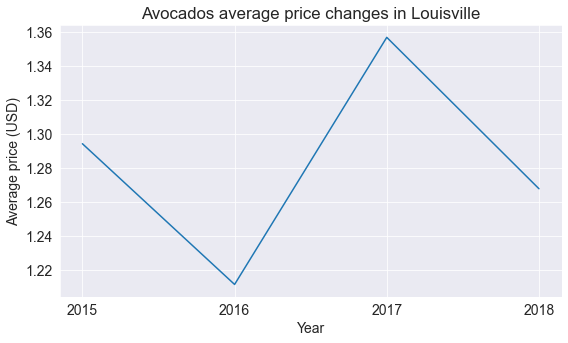

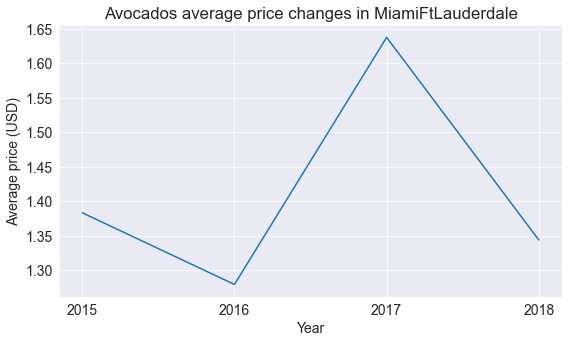

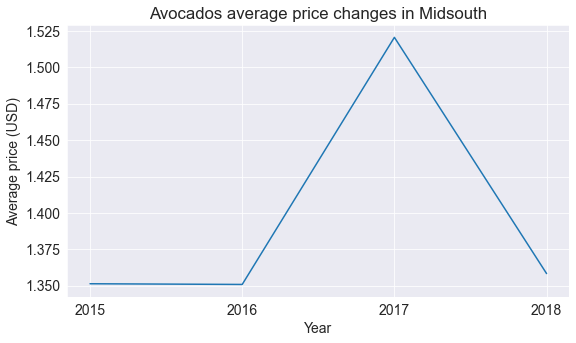

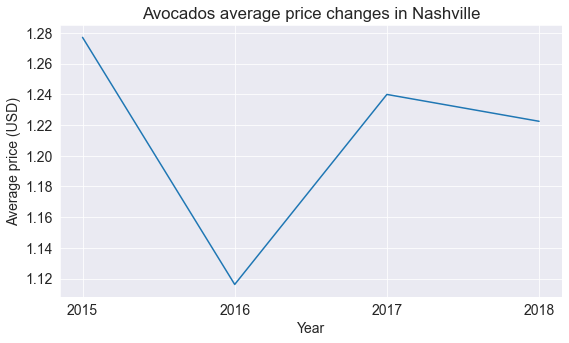

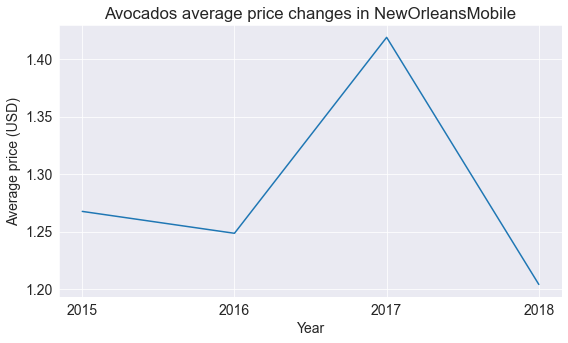

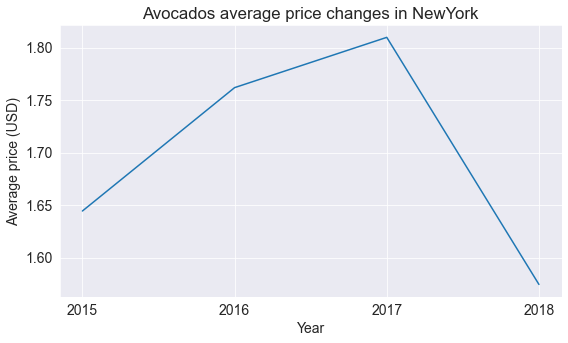

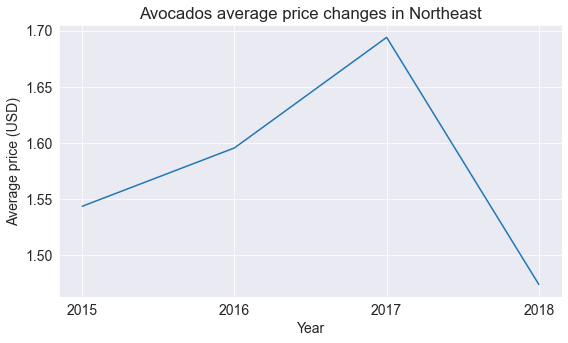

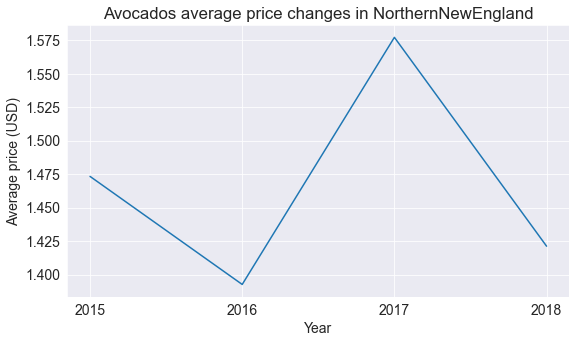

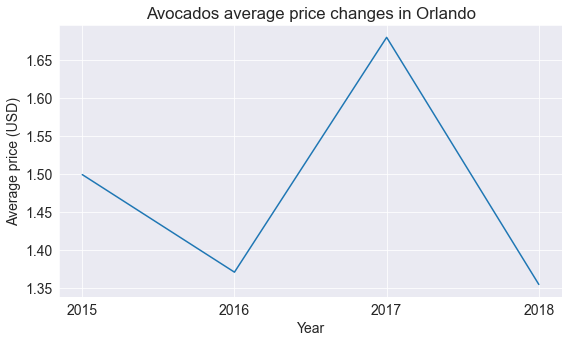

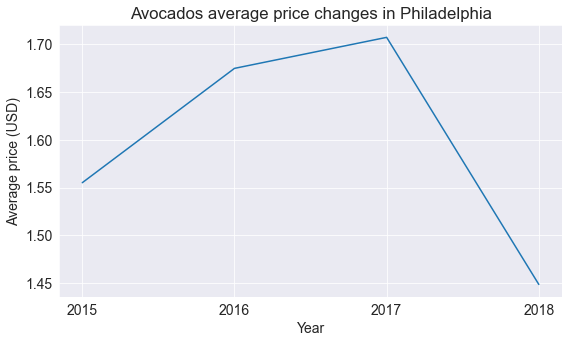

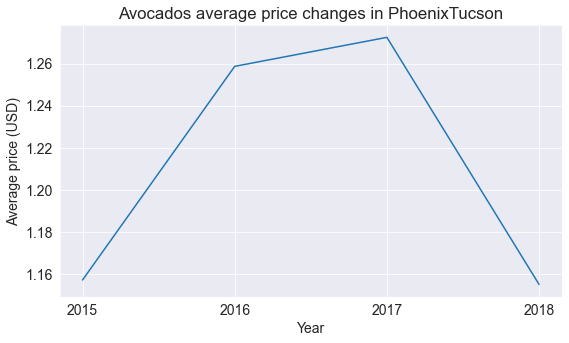

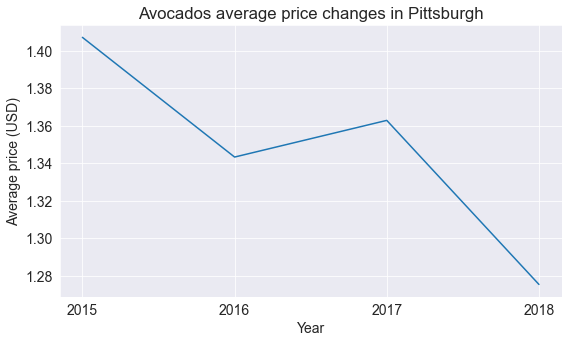

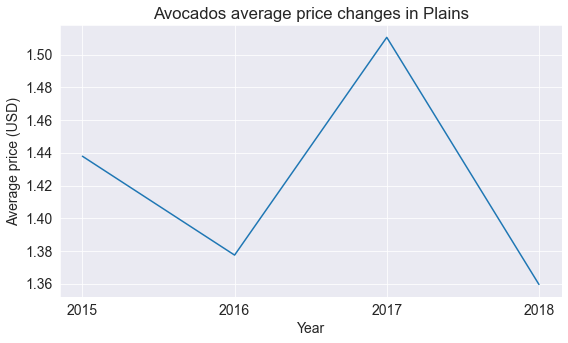

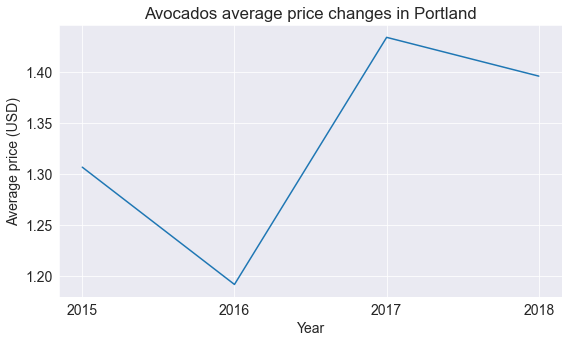

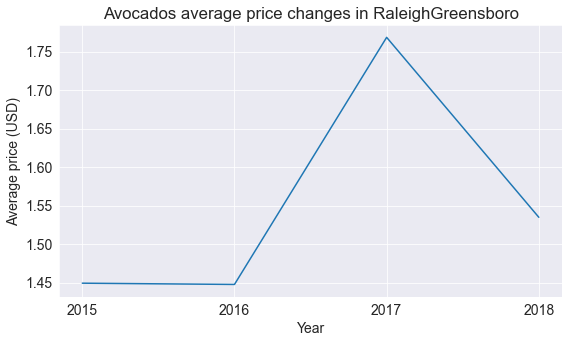

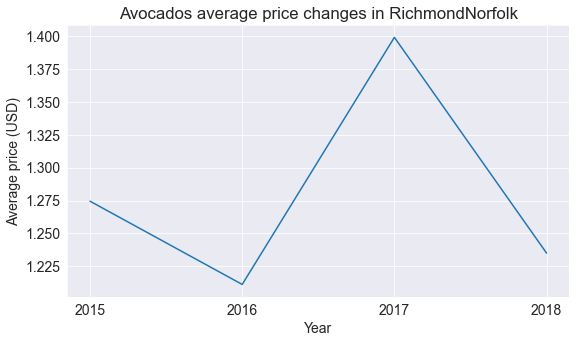

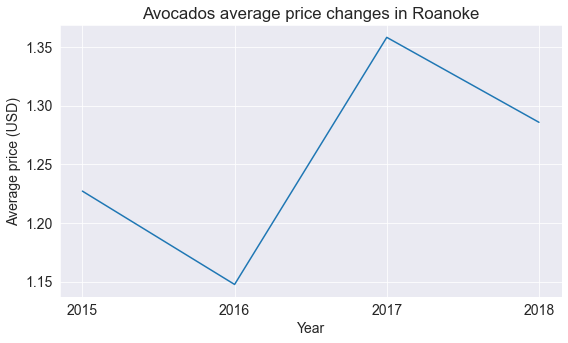

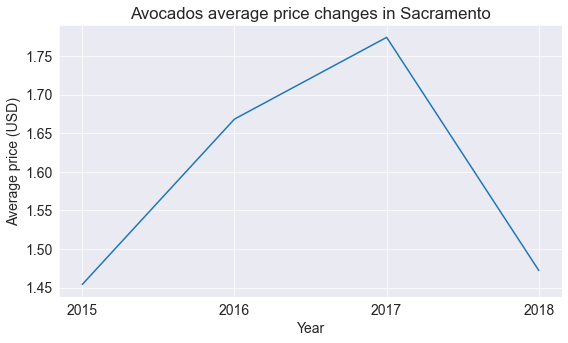

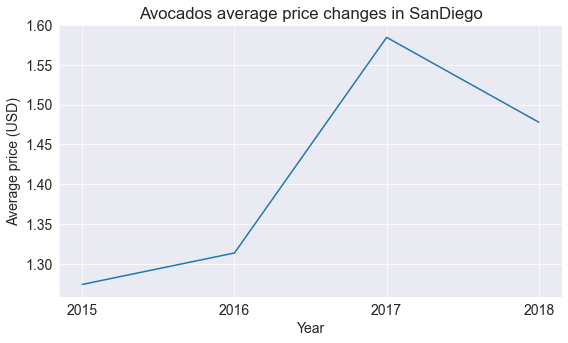

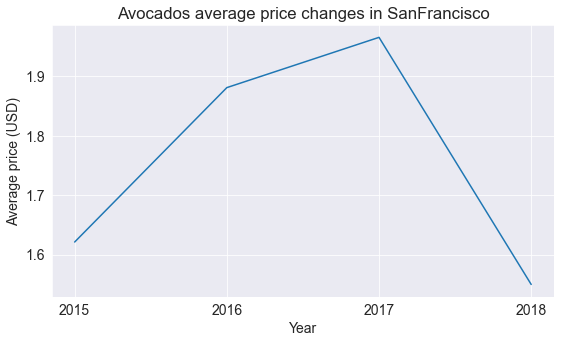

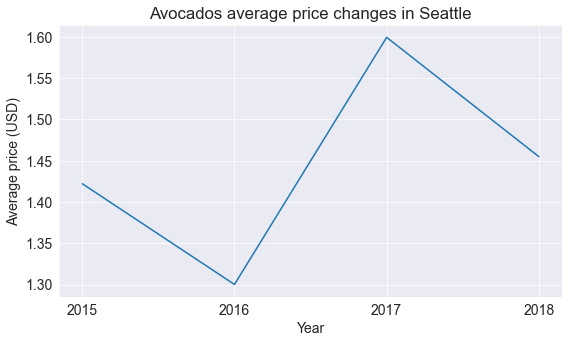

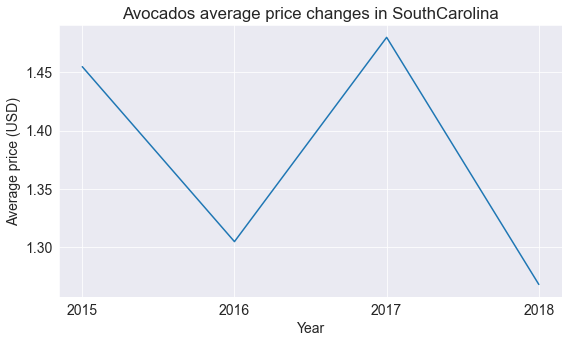

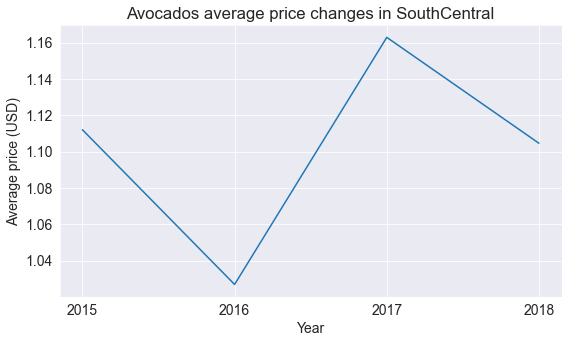

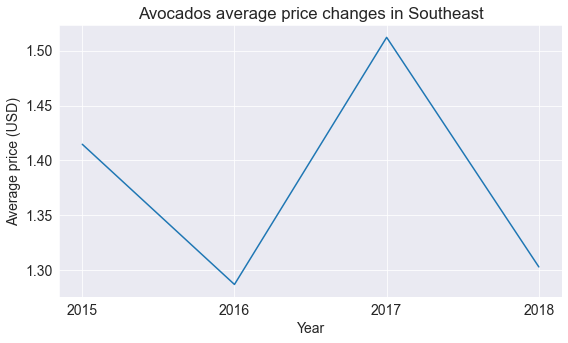

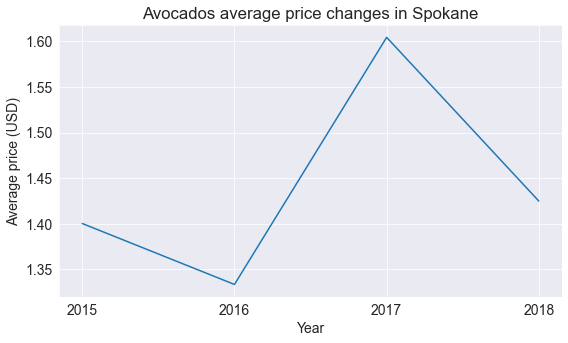

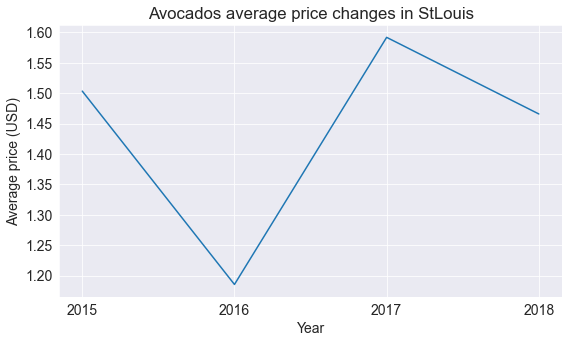

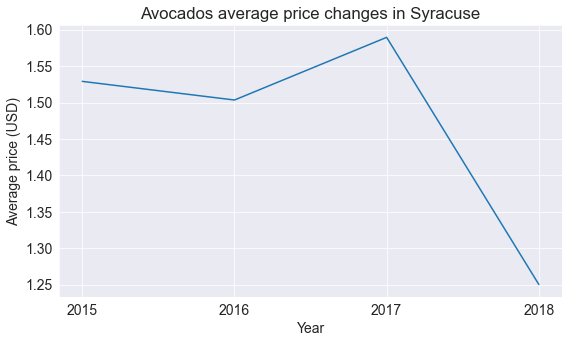

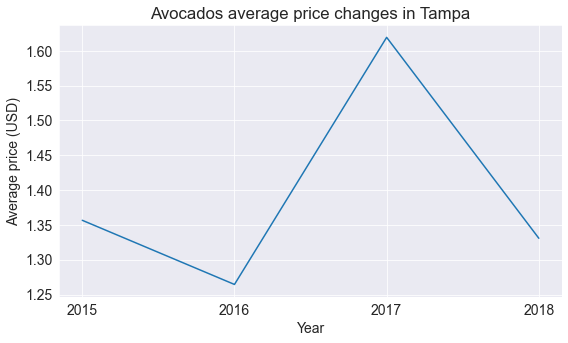

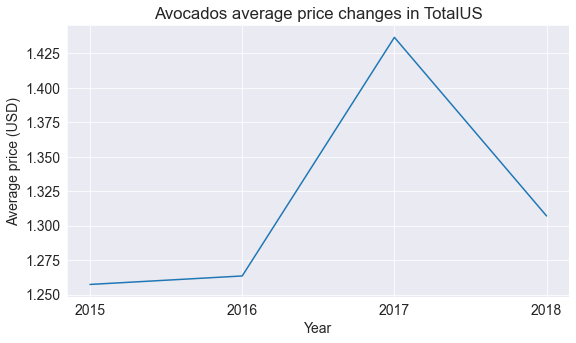

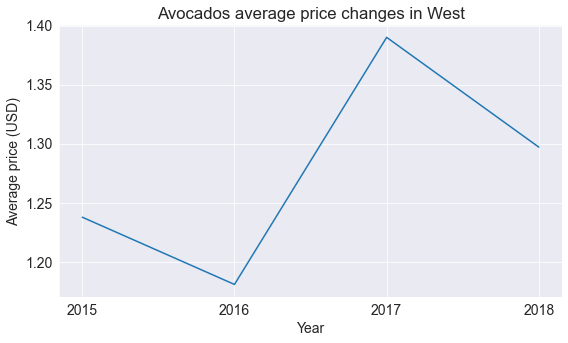

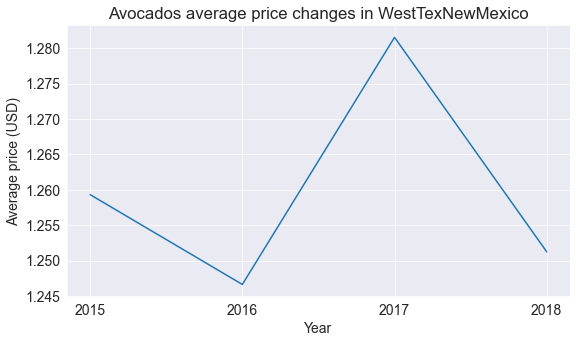

In [69]:
for region in regions:
    region_df = df[df["region"] == region] # Select all data based on region
    x = region_df.year.unique() # Select all the years
    y = region_df.groupby(['year']).mean().average_price # Select the average price in each region based on year
    
    # Now, plot the selected region data
    plt.plot(x,y)
    plt.title(f"Avocados average price changes in {region}")
    plt.xlabel("Year")
    plt.ylabel("Average price (USD)")
    plt.xticks(x)
    plt.show()

We can see that the price changes are random in each random although there are certain pattern like the reversed-N patter in some regions. That's something we can explore further

#### Q4: How does yearly sales number of each avocado categories (conventional & organic) differs? 

1. divide the df into 2: conventional and organic
2. divide it again based on year
2. plot the yearly total sales of each category using bar chart

In [129]:
conventional_df = df[df['type'] == 'conventional']
organic_df = df[df['type'] == 'organic']

<ipython-input-132-fafb406a5232>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,1,2,3,4,5])


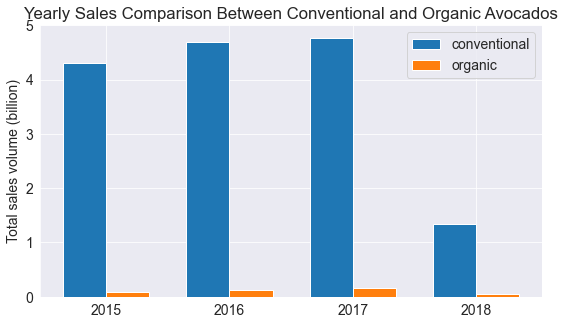

In [132]:
y1 = conventional_df.groupby(['year']).sum().total_volume
y2 = organic_df.groupby(['year']).sum().total_volume

labels = dates.year.unique()
x = np.arange(len(dates.year.unique()))
width=0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1, width, label='conventional')
rects2 = ax.bar(x + width/2, y2, width, label='organic')

ax.set_ylabel('Total sales volume (billion)')
ax.set_title('Yearly Sales Comparison Between Conventional and Organic Avocados')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticklabels([0,1,2,3,4,5])
ax.legend()

plt.show()

In [249]:
for year in df.year.unique():
    print(f"Organic vs conventional avocados in year: {year}")
    for region in regions:
        conventional_df_total_volume = conventional_df[(conventional_df['year'] == year) & (conventional_df['region'] == region)].sum().total_volume
        organic_df_total_volume = organic_df[(organic_df['year'] == year) & (organic_df['region'] == region)].sum().total_volume
        diff = abs(conventional_df_total_volume - organic_df_total_volume)
        diff_percentage = diff / conventional_df_total_volume * 100
        print(f"{region}: {diff_percentage.round()}%")

Organic vs conventional avocados in year: 2015
Albany: 98.0%
Atlanta: 99.0%
BaltimoreWashington: 98.0%
Boise: 97.0%
Boston: 99.0%
BuffaloRochester: 97.0%
California: 98.0%
Charlotte: 98.0%
Chicago: 97.0%
CincinnatiDayton: 94.0%
Columbus: 97.0%
DallasFtWorth: 99.0%
Denver: 95.0%
Detroit: 97.0%
GrandRapids: 99.0%
GreatLakes: 98.0%
HarrisburgScranton: 99.0%
HartfordSpringfield: 99.0%
Houston: 99.0%
Indianapolis: 99.0%
Jacksonville: 98.0%
LasVegas: 97.0%
LosAngeles: 98.0%
Louisville: 98.0%
MiamiFtLauderdale: 100.0%
Midsouth: 97.0%
Nashville: 96.0%
NewOrleansMobile: 99.0%
NewYork: 99.0%
Northeast: 99.0%
NorthernNewEngland: 98.0%
Orlando: 99.0%
Philadelphia: 99.0%
PhoenixTucson: 99.0%
Pittsburgh: 98.0%
Plains: 98.0%
Portland: 93.0%
RaleighGreensboro: 97.0%
RichmondNorfolk: 97.0%
Roanoke: 94.0%
Sacramento: 98.0%
SanDiego: 98.0%
SanFrancisco: 97.0%
Seattle: 93.0%
SouthCarolina: 99.0%
SouthCentral: 99.0%
Southeast: 99.0%
Spokane: 96.0%
StLouis: 98.0%
Syracuse: 97.0%
Tampa: 99.0%
TotalUS: 98.0%


In [238]:
conventional_df[conventional_df['year'] == 2015].sum()

average_price          3.026920e+03
total_volume           4.296599e+09
non_org_med_hass       1.684012e+09
non_org_large_hass     1.722568e+09
non_org_xlarge_hass    1.419177e+08
total_bags             7.481009e+08
small_bags             6.194886e+08
large_bags             1.231692e+08
xlarge_bags            5.443128e+06
dtype: float64

we can now see the astounding difference in sales number between conventional and organic avocados. Even though the organic ones cost only 50% more than conventional ones, the sales number difference is always almost 100%. Author hypothesized that this number can be contributed from different factors such as the supply of organic avocado itself is way less than conventional ones and that there aren't as many stores selling organic ones rather than conventional ones.

### Q5: How much is the average price difference between conventional and organic avocados?

In [133]:
conventional_avg_price = conventional_df.describe().average_price['mean']

In [134]:
organic_avg_price = organic_df.describe().average_price['mean']

In [135]:
diff = abs(conventional_avg_price-organic_avg_price)

In [136]:
diff_percentage = diff/conventional_avg_price * 100
print(f'Percent difference: {diff_percentage}%')

Percent difference: 42.8274636818886%


Organic avocados are roughly 40% more expensive than conventional avocados

### Q6: How does the sales volume of each avocado sizes differ from each other?

We can asnwer this question by looping each region, grouping them by year, sum the total volume in of each avocado size, and plot the graph

In [70]:
df.head()

,date,average_price,total_volume,non_org_med_hass,non_org_large_hass,non_org_xlarge_hass,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<ipython-input-226-8ddc98ecf724>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,1,2,3,4,5])


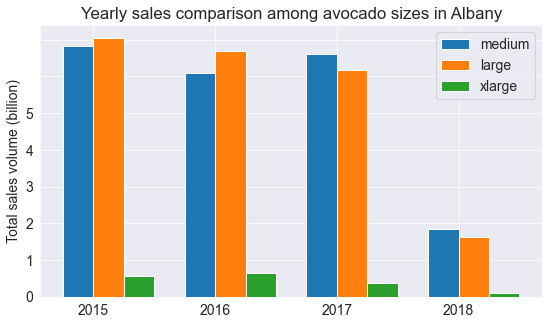

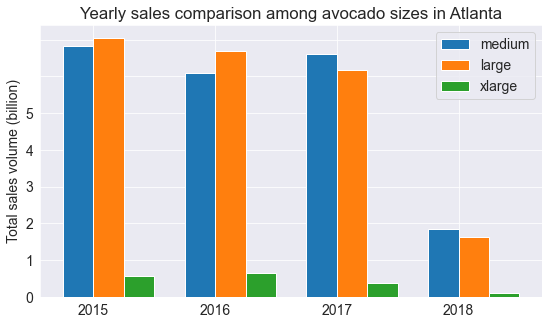

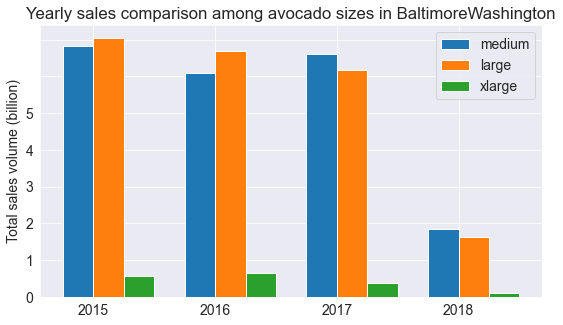

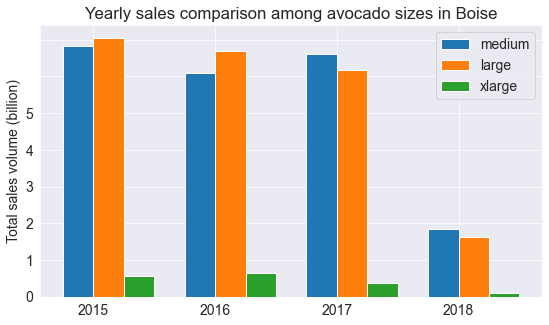

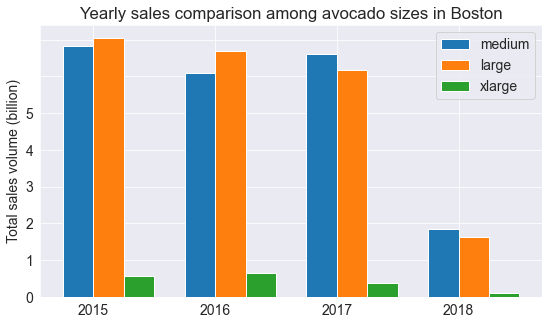

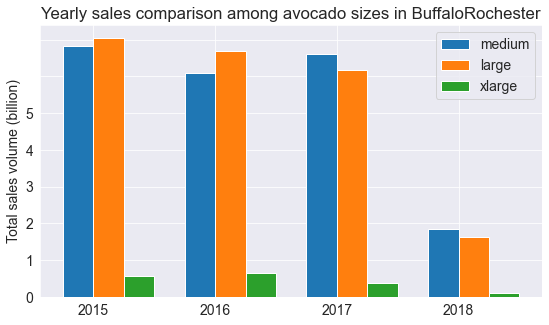

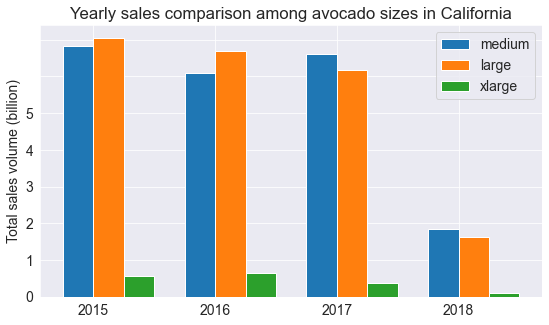

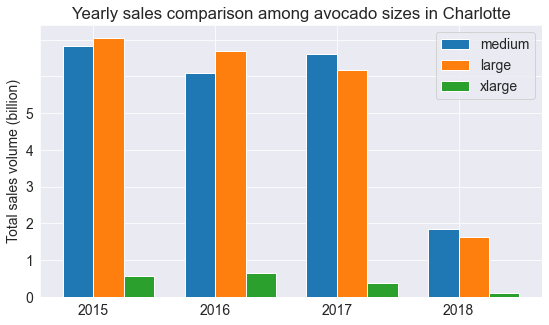

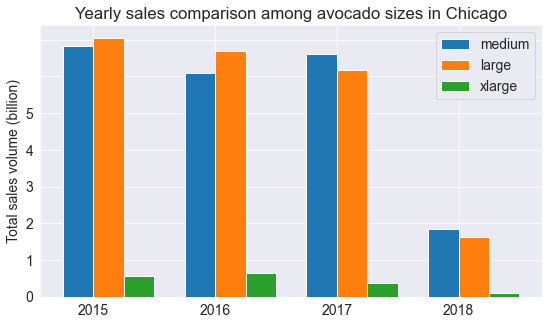

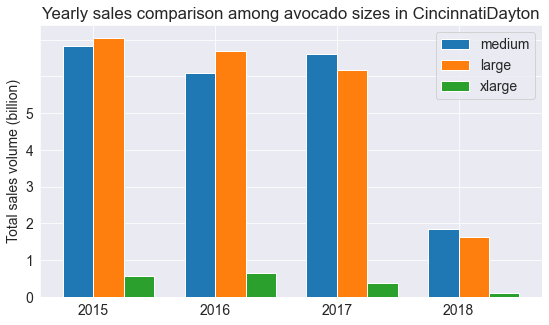

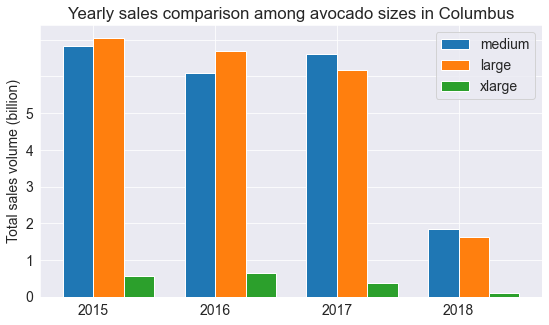

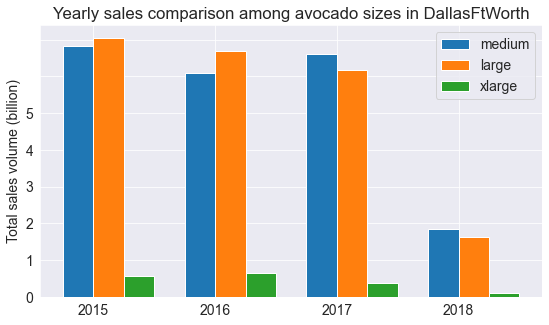

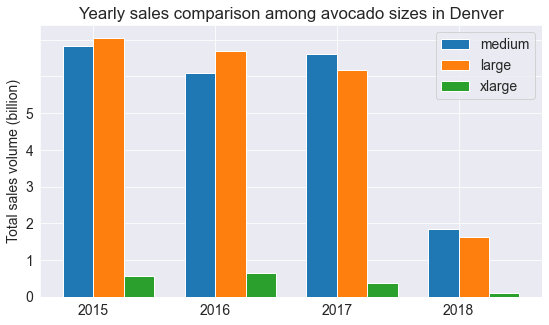

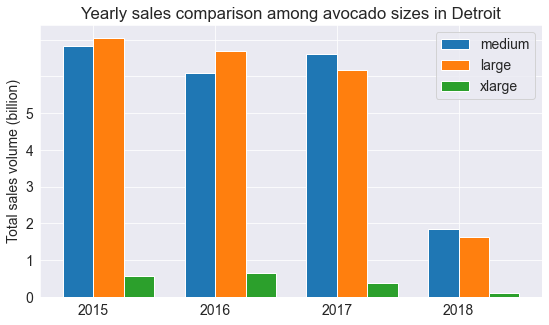

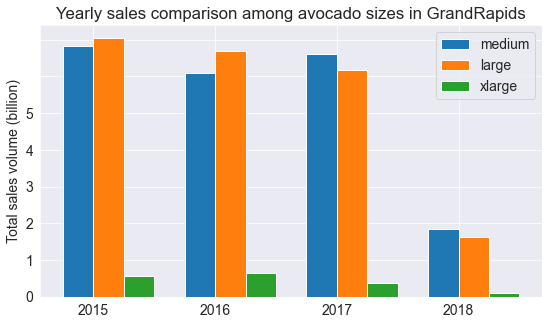

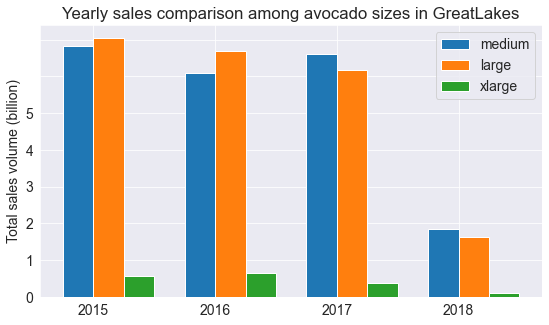

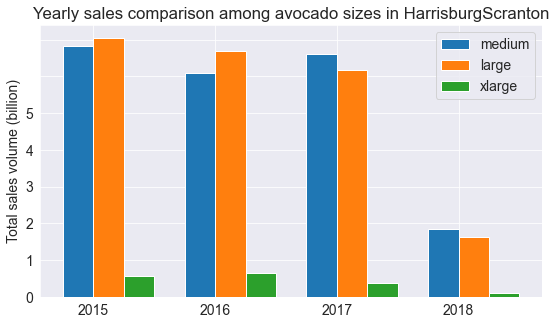

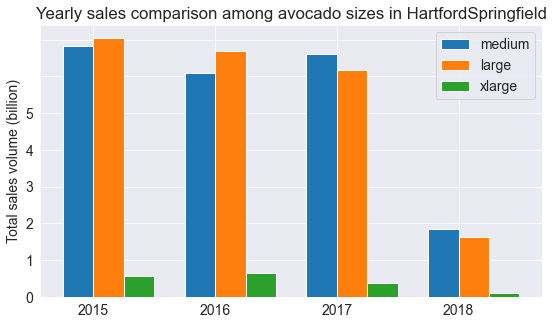

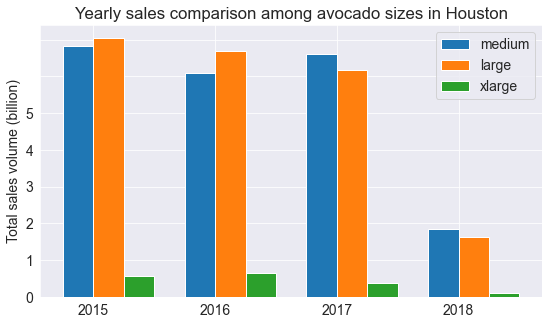

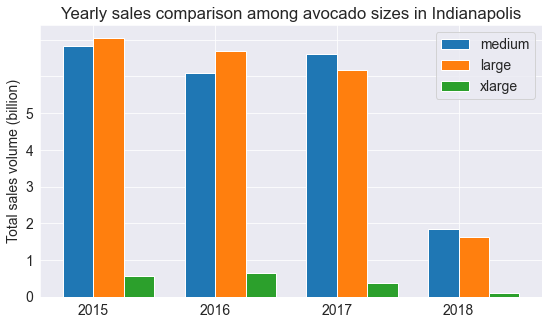

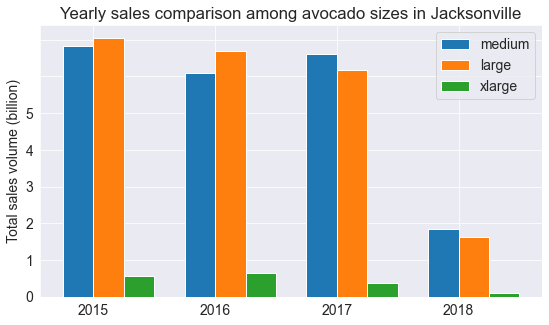

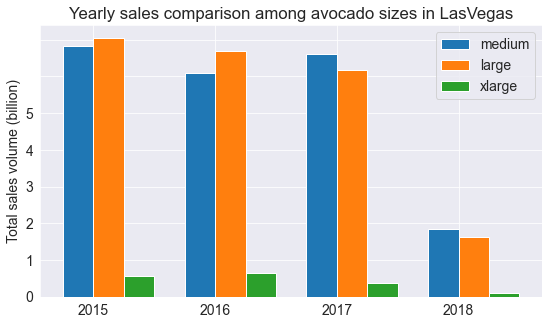

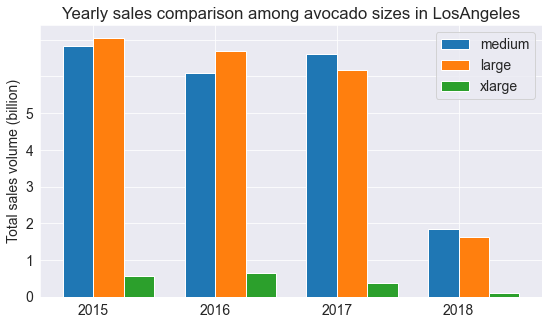

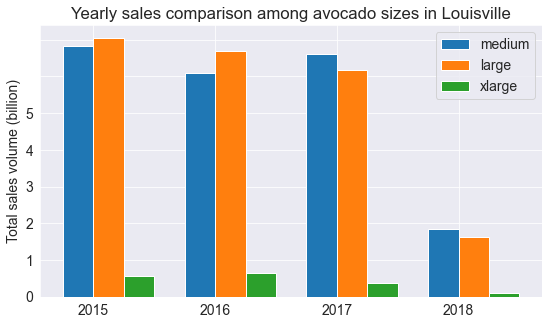

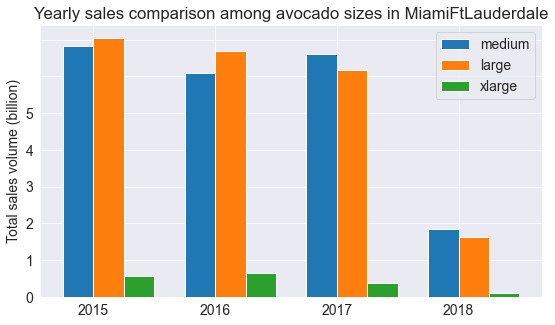

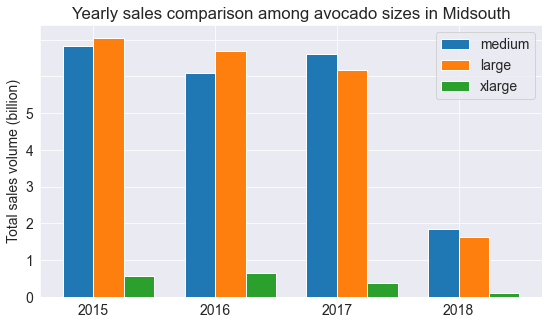

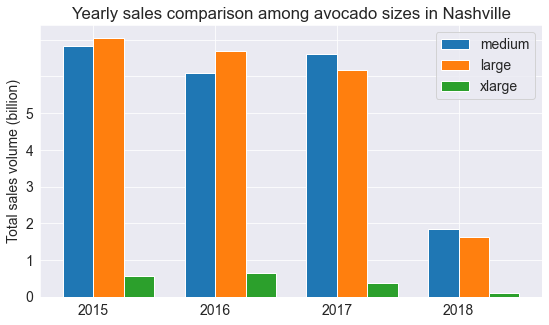

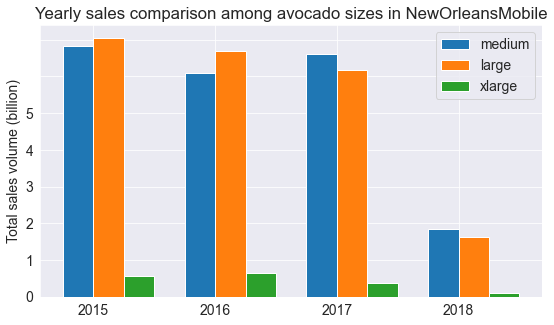

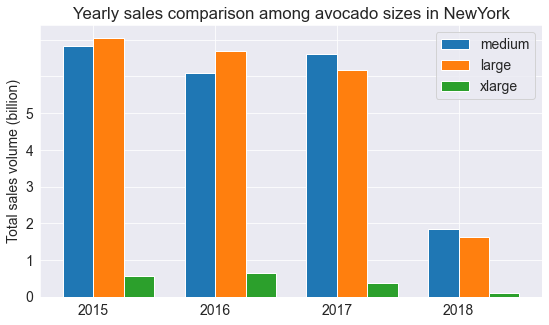

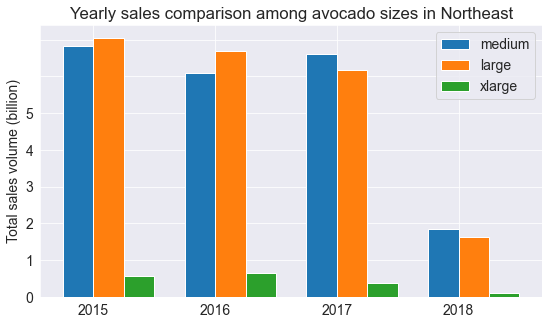

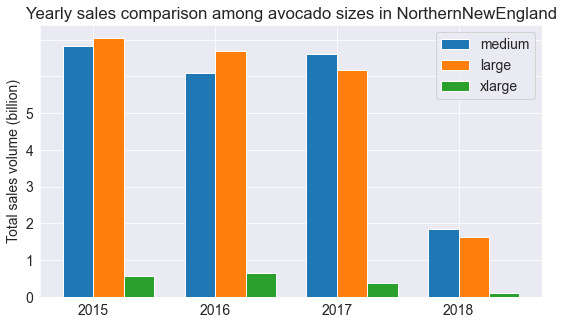

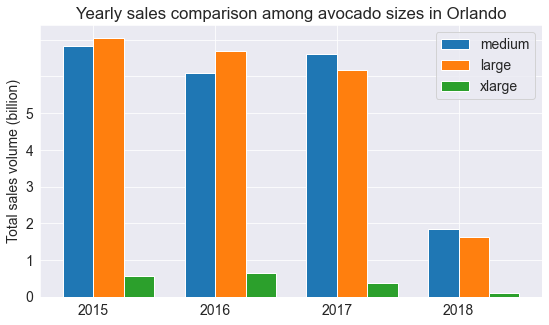

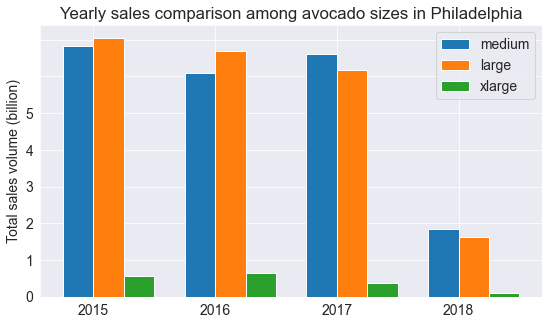

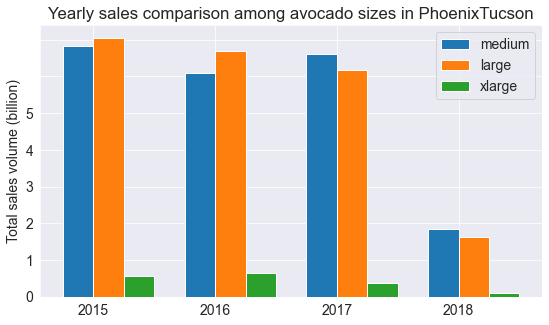

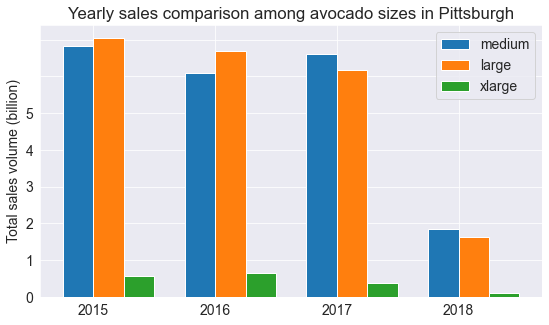

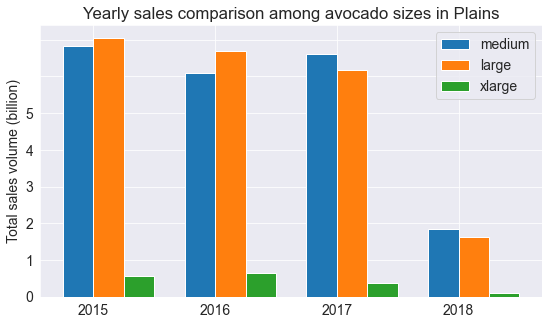

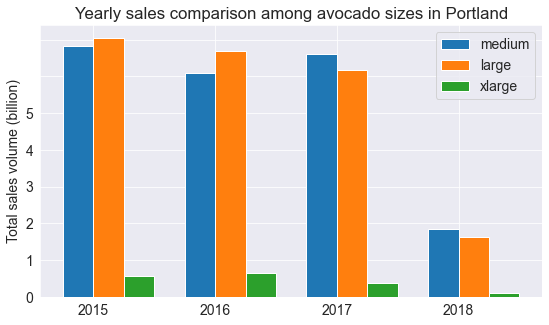

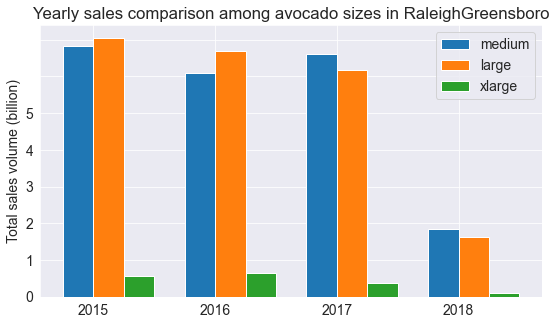

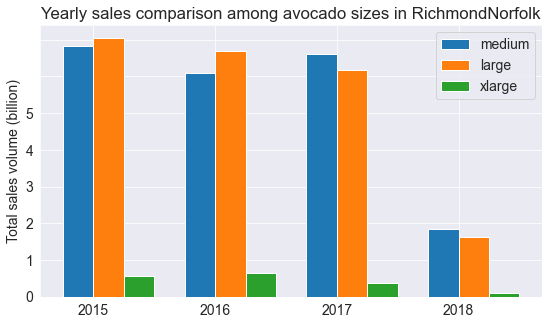

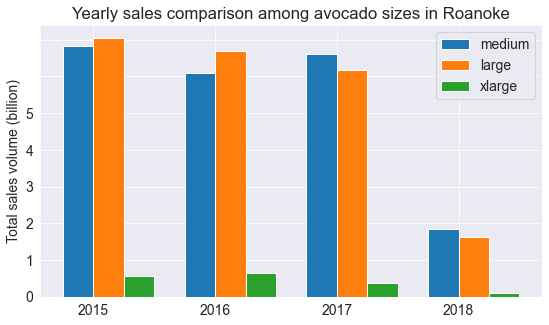

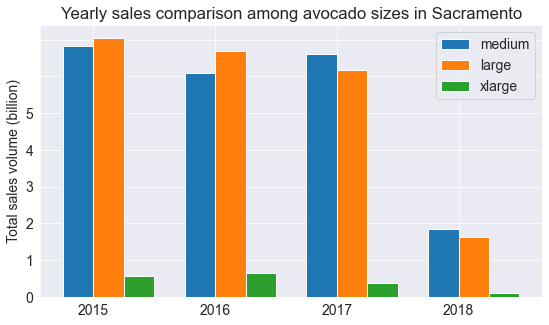

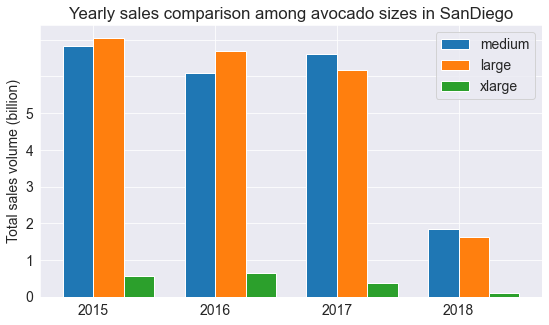

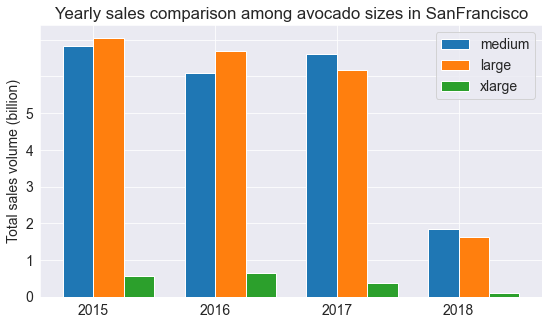

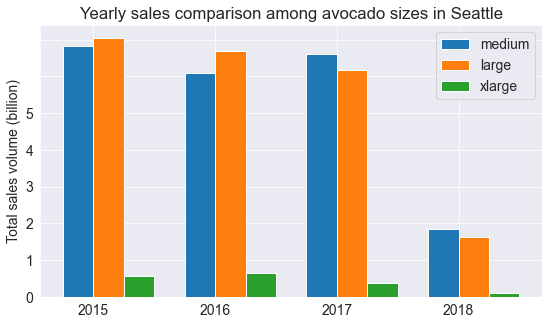

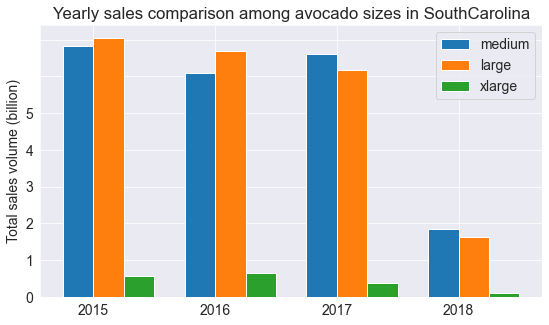

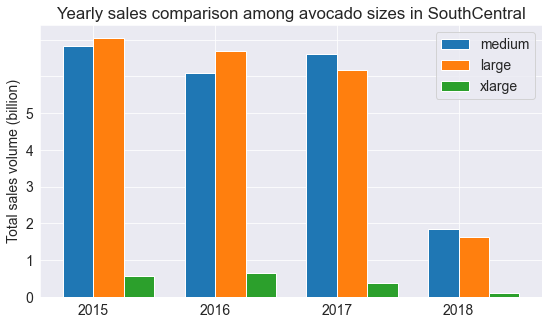

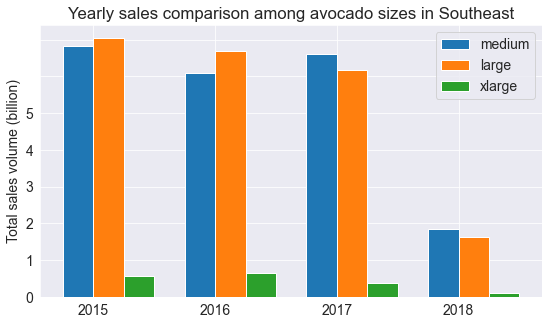

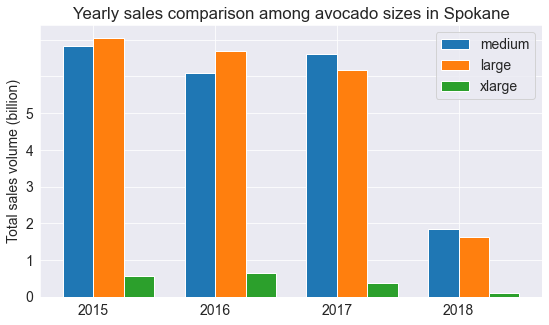

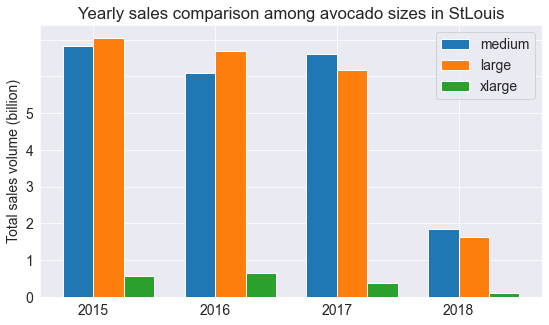

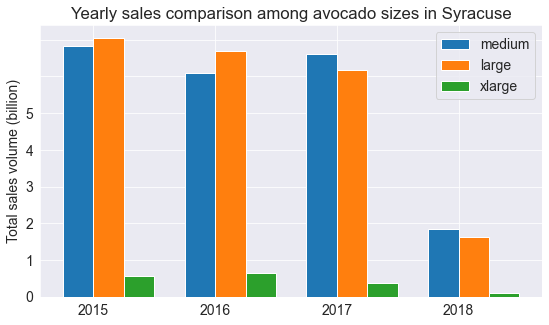

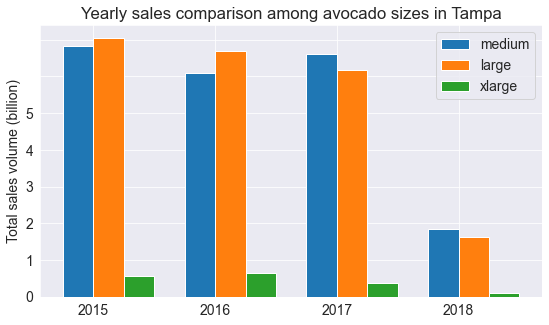

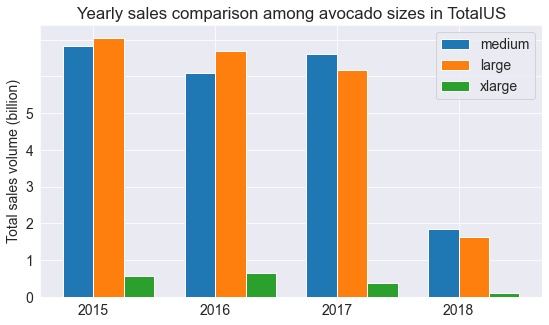

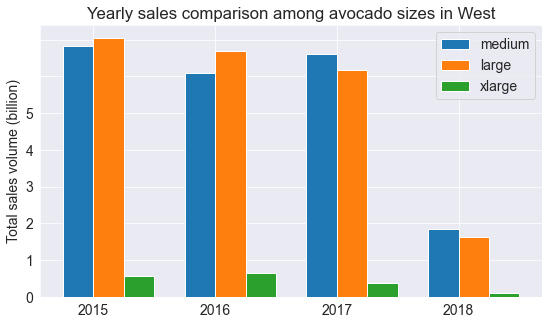

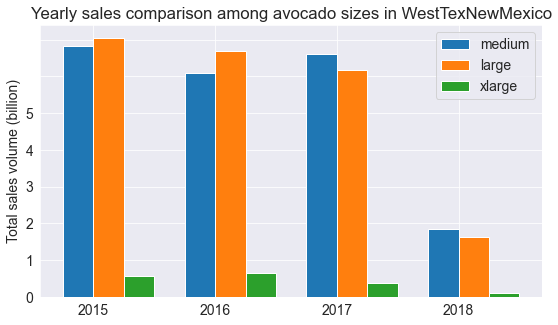

In [226]:
for region in regions:
    y1 = df.groupby(['year']).sum().non_org_med_hass
    y2 = df.groupby(['year']).sum().non_org_large_hass
    y3 = df.groupby(['year']).sum().non_org_xlarge_hass
    
    labels = dates.year.unique()
    x = np.arange(len(dates.year.unique()))
    width=0.25

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, y1, width, label='medium')
    rects2 = ax.bar(x + width/2, y2, width, label='large')
    rects23 = ax.bar(x + width*3/2, y3, width, label='xlarge')

    ax.set_ylabel('Total sales volume (billion)')
    ax.set_title(f'Yearly sales comparison among avocado sizes in {region}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_yticklabels([0,1,2,3,4,5])
    ax.legend()

    plt.show()

We can now see the comparison between sizes and see its fluctuation across the years

Let us save and upload our work to Jovian before continuing.

In [228]:
import jovian

In [229]:
jovian.commit(environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "naufal-anof/avocado-prices" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/naufal-anof/avocado-prices


'https://jovian.ai/naufal-anof/avocado-prices'

## Inferences and Conclusion

   We have explored the dataset and now can get a hint about what's going about in the data. First, we did descriptive analysis on it and can say that the average price of all avocados combined is 1.405 USD, the average sales volume/day is roughly 850k, the average organic avocados cost 50% more than conventional avocados.Then, we do some visualization and based on the yearly avocados sales price, we can see that avocados' sales plummeted down by roughly 75% in 2018. We can also see that the sales volume of organic avocados differs greatly than conventional avocados. We can also see, based on the average price per region, that san fransisco and springfield has the most expensive prices for avocados (roughly 1.8 USD) whereas Houston and Dallas Fort Worth have the least expensive avocados. we can also see from the graph that there's a pattern for some region where the price spikes down in 2016 and then it went back up in 2017 creating a reversed N pattern. But for some others, there are different patterns such as up and down, etc

In [230]:
import jovian

In [231]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "naufal-anof/avocado-prices" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/naufal-anof/avocado-prices


'https://jovian.ai/naufal-anof/avocado-prices'

## References and Future Work

This dataset hasn't been thoroughly explored and analyzed. All we just did is basic exploratory analysis.

But we can explore further and deeper into the data and search for more insights on a deeper level. Previously we have seen that there are certain pattern on price changes per region. We can analyze further the activities on each region to find out the cause of the price drop. We can also analyze further relationships between other variables.

In [250]:
import jovian

In [251]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "naufal-anof/avocado-prices" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/naufal-anof/avocado-prices


'https://jovian.ai/naufal-anof/avocado-prices'